<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP_2022/blob/main/05%20Deep%20Learning/notebooks/3-MLP_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h4>Redes neuronales en tareas de Regresión</h4>

En esta notebook se presentan dos ejemplos que ilustran cómo usar redes neuronales MLP como herramientas para tareas de regresión.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#1. Ejemplo 1: IRIS Dataset

El conjunto de datos de flores de Iris o conjunto de datos de Iris de Fisher es un conjunto de datos introducido por el estadístico y biólogo británico Ronald Fisher en su artículo de 1936 *The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis*. A veces se denomina conjunto de datos de Iris de Anderson porque Edgar Anderson recopiló los datos para cuantificar la variación morfológica de las flores de Iris de tres especies relacionadas. Dos de las tres especies se recogieron en la península de Gaspé "todas en el mismo pasto, y se recogieron el mismo día y se midieron al mismo tiempo por la misma persona con el mismo aparato".

El conjunto de datos consta de 50 muestras de cada una de las tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midieron cuatro características de cada muestra: la longitud y la anchura de los sépalos y los pétalos, en centímetros.

La versión original del dataset puede encontrarse [aquí](https://archive.ics.uci.edu/ml/datasets/iris).

<img align="left" width="50%" src="../img/Iris-dataset.png"/> 

**El objetivo de este ejemplo es usar la longitud y ancho de los pétalos para predecir la longitud y ancho de los sépalos.**

## El conjunto de datos

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

print(f"Data shape: {iris.data.shape}")

Data shape: (150, 4)


Observemos el conjunto de datos completo

In [ ]:
import pandas as pd

data = np.hstack((iris.data,iris.target.reshape(-1,1)))
pd.DataFrame(data,columns=['petal length','petal width','sepal length','sepal width','species'])

,petal length,petal width,sepal length,sepal width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


X data: (150, 2)
Y data: (150, 2)
L data: (150,)


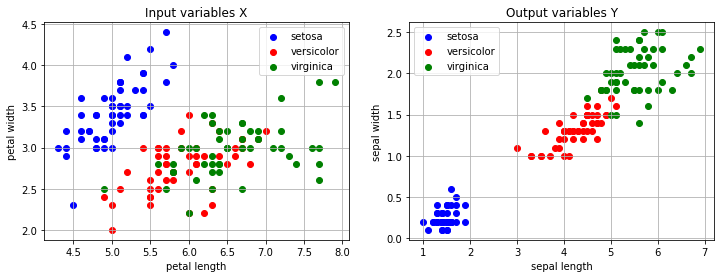

In [ ]:
# We also keep the labels in a vector L
X = iris.data[:, :2]    # Dimensiones de los pétalos
Y = iris.data[:, 2:]    # Dimensiones de los sépalos
L = iris.target         # Etiquetas de la especie

print("X data:", X.shape)
print("Y data:", Y.shape)
print("L data:", L.shape)

# ----- Graficamos -----
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[L==0, 0], X[L==0, 1], c='b', label='setosa')
plt.scatter(X[L==1, 0], X[L==1, 1], c='r', label='versicolor')
plt.scatter(X[L==2, 0], X[L==2, 1], c='g', label='virginica')
plt.legend()
plt.grid(True)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Input variables X')
plt.subplot(1, 2, 2)
plt.scatter(Y[L==0, 0], Y[L==0, 1], c='b', label='setosa')
plt.scatter(Y[L==1, 0], Y[L==1, 1], c='r', label='versicolor')
plt.scatter(Y[L==2, 0], Y[L==2, 1], c='g', label='virginica')
plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Output variables Y')
plt.show()

In [ ]:
# Split it into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test, l_train, l_test = train_test_split(X, Y, L, test_size=0.1)

print("Training + validation inputs X:", x_train.shape)
print("Test inputs X:", x_test.shape)
print("Training + validation outputs Y:", y_train.shape)
print("Test outputs Y:", y_test.shape)
print("Training + validation labels l:", l_train.shape)
print("Test labels l:", l_test.shape)

Training + validation inputs X: (135, 2)
Test inputs X: (15, 2)
Training + validation outputs Y: (135, 2)
Test outputs Y: (15, 2)
Training + validation labels l: (135,)
Test labels l: (15,)


## Creamos la red

In [ ]:
# import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense

In [ ]:
# Create an MLP of two inputs x=[x1, x2], and two outputs y=[y1, y2]
i = Input(shape=(2,), name='input')
o = Dense(units=2, activation=None, name='output')(i)

MLP = Model(inputs=i, outputs=o)
MLP.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2)]               0         
                                                                 
 output (Dense)              (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Obtain weights and biases of the hidden layer
w1, b1 = MLP.layers[1].get_weights()
print("Initial weights:", w1.shape)
print(w1)
print("Initial biases", b1.shape)
print(b1)

Initial weights: (2, 2)
[[ 0.53404784 -0.7829732 ]
 [-0.26474208  0.18040693]]
Initial biases (2,)
[0. 0.]


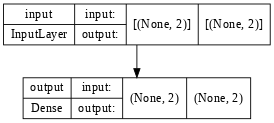

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(MLP, to_file='MLP.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=64)

In [ ]:
MLP.compile(optimizer='sgd', loss='mse')

## Entrenamos la red

In [ ]:
n_epocas = 100

HISTORY = MLP.fit(x=x_train, y=y_train, batch_size=4, epochs=n_epocas, validation_split=0.1)

Aquí se muestra una segunda forma de graficar la perdida durante el entrenamiento. De esta forma no hay que especificar manualmente la cantidad de épocas.

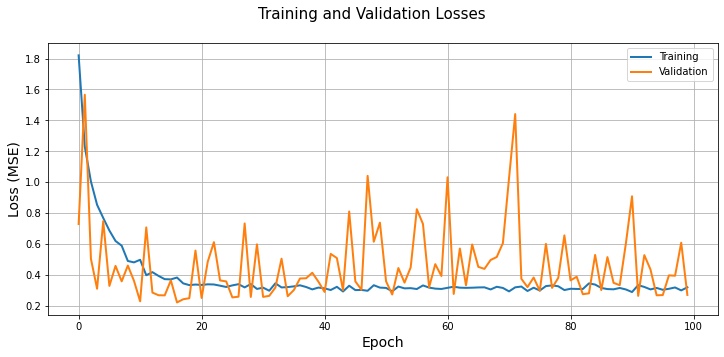

In [ ]:
plt.figure(figsize=(12, 5))
plt.suptitle("Training and Validation Losses", fontsize=15)
plt.plot(MLP.history.history['loss'], label='Training', linewidth=2)
plt.plot(MLP.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss (MSE)', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# Obtain weights and biases of the hidden layer after training
w1, b1 = MLP.layers[1].get_weights()
print("Initial weights:", w1.shape)
print(w1)
print("Initial biases", b1.shape)
print(b1)

Initial weights: (2, 2)
[[ 1.6457497   0.6364732 ]
 [-1.7829107  -0.72696346]]
Initial biases (2,)
[-0.7580318 -0.4121375]


## Resultados y Evaluación

Use the trained model to compute the average test loss

In [ ]:
MLP.evaluate(x=x_test, y=y_test, verbose=False)

0.4066779315471649

In [ ]:
# Now generate the predictions on the test set
y_test_hat = MLP.predict(x=x_test)
print(y_test_hat.shape)

(15, 2)


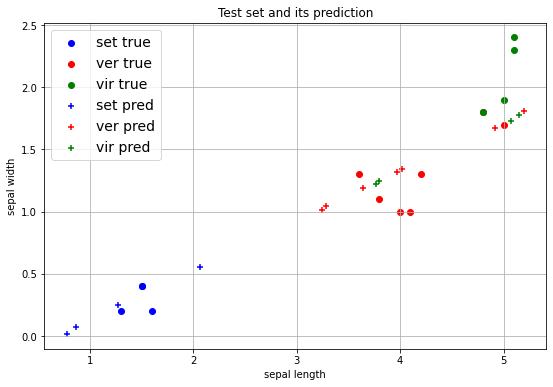

In [ ]:
plt.figure(figsize=(9,6))

plt.scatter(y_test[l_test==0, 0], y_test[l_test==0, 1], c='b', label='set true')
plt.scatter(y_test[l_test==1, 0], y_test[l_test==1, 1], c='r', label='ver true')
plt.scatter(y_test[l_test==2, 0], y_test[l_test==2, 1], c='g', label='vir true')

plt.scatter(y_test_hat[l_test==0, 0], y_test_hat[l_test==0, 1], c='b', marker='+', label='set pred')
plt.scatter(y_test_hat[l_test==1, 0], y_test_hat[l_test==1, 1], c='r', marker='+', label='ver pred')
plt.scatter(y_test_hat[l_test==2, 0], y_test_hat[l_test==2, 1], c='g', marker='+', label='vir pred')

plt.legend(fontsize=14)
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Test set and its prediction')
plt.show()

## Podemos definir la red, de manera alterna, usando la clase `Sequential`.

There are two ways to define a model in `keras`:

* Sequential class: Sequential groups a linear stack of layers into a tf. keras.Model.
* Model class: Model group's layers into an object with training and inference features.

An Sequential model is the simplest type of model, a linear stack of layers. But there are some flaws as we can't build complex networks such as multi-input or multi-output networks using this API.

On the other hand, using the Model class, we can create arbitrary graphs of layers. From this, we can get more flexibility and easily define models where each layer can connect not just with the previous and next layers but also share feature information with other layers in the model.

In [ ]:
MLP = Sequential()

MLP.add(Input(shape=(2,), name='input'))
MLP.add(Dense(units=2, activation=None, name='output'))

MLP.summary()

MLP.compile(optimizer='sgd', loss='mse')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 output (Dense)              (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
HISTORY = MLP.fit(x=x_train, y=y_train, batch_size=4, epochs=100, validation_split=0.1)

In [ ]:
MLP.evaluate(x=x_test, y=y_test, verbose=False)

0.3494007885456085

## Probamos con una red más grande

In [ ]:
i = Input(shape=(2,), name='input')
h = Dense(units=32, activation='sigmoid', name='hidden1')(i)
h = Dense(units=128, activation='sigmoid', name='hidden2')(h)
h = Dense(units=32, activation='sigmoid', name='hidden3')(h)
o = Dense(units=2, activation=None, name='output')(h)

MLP = Model(inputs=i, outputs=o)
MLP.summary()

In [ ]:
MLP.compile(optimizer='sgd', loss='mse')

In [ ]:
MLP.fit(x=x_train, y=y_train, batch_size=8, epochs=100, verbose=2, validation_split=0.1)

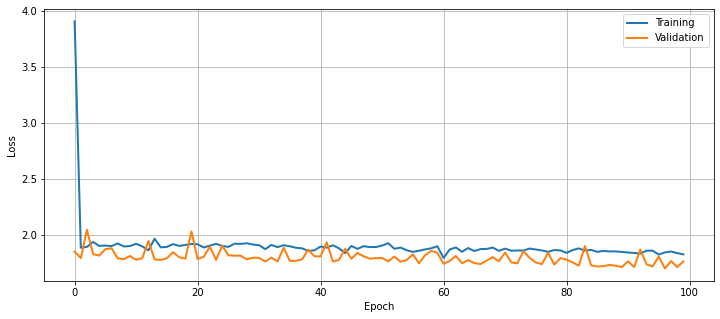

In [ ]:
# Plot loss (The object MLP keeps track of the training and validation performance)
plt.figure(figsize=(12, 5))
plt.plot(MLP.history.history['loss'], label='Training', linewidth=2)
plt.plot(MLP.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

Obtain weights and biases of the hidden layer

In [ ]:
for layer in MLP.layers[1:]:
  w, b = layer.get_weights()
  print("Weights: ", w.shape, end='\t')
  print("Biases:  ", b.shape)

Weights:  (2, 32)	Biases:   (32,)
Weights:  (32, 64)	Biases:   (64,)
Weights:  (64, 32)	Biases:   (32,)
Weights:  (32, 2)	Biases:   (2,)


Evaluamos la pérdida promedio en el conjunto de prueba

In [ ]:
MLP.evaluate(x=x_test, y=y_test, verbose=False)

1.61572265625

Generamos las predicciones

In [ ]:
y_test_hat = MLP.predict(x=x_test)
print(y_test_hat.shape)

(15, 2)


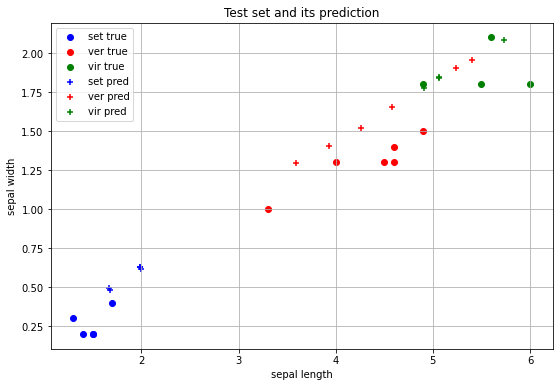

In [ ]:
plt.figure(figsize=(9,6))

plt.scatter(y_test[l_test==0, 0], y_test[l_test==0, 1], c='b', label='set true')
plt.scatter(y_test[l_test==1, 0], y_test[l_test==1, 1], c='r', label='ver true')
plt.scatter(y_test[l_test==2, 0], y_test[l_test==2, 1], c='g', label='vir true')

plt.scatter(y_test_hat[l_test==0, 0], y_test_hat[l_test==0, 1], c='b', marker='+', label='set pred')
plt.scatter(y_test_hat[l_test==1, 0], y_test_hat[l_test==1, 1], c='r', marker='+', label='ver pred')
plt.scatter(y_test_hat[l_test==2, 0], y_test_hat[l_test==2, 1], c='g', marker='+', label='vir pred')

plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Test set and its prediction')
plt.show()

## ⭕ Prática: 

Crea una red neuronal para el problema de predecir la clase usando las 4 mediciones de cada instancia (petal length, petal width, sepal length, sepal width).

In [30]:
from sklearn.datasets import load_iris

iris = load_iris()

In [ ]:
from tensorflow.keras.utils import to_categorical

X = iris.data
L = iris.target        

Y = to_categorical(L,num_classes=3)

# Ejemplo 2: Boston house price dataset

El conjunto de datos describe 13 features numéricas de casas en los suburbios de Boston, el objetivo es modelar el precio de las casas en esos suburbios en miles de dólares. Como tal, se trata de un problema de modelización predictiva por regresión. Los atributos de entrada incluyen, entre otras cosas, la tasa de criminalidad, la proporción de acres de negocios no minoristas y  las concentraciones de productos químicos. En esta versión del conjunto de datos no se tiene la información concreta sobre cada columna.

Se trata de un problema bien estudiado en el Machine Learning. El rendimiento razonable de los modelos evaluados mediante el error cuadrático medio (MSE) se sitúa en torno a 20 (en miles de dólares al cuadrado) o 4.5 dólares (si se saca la raíz cuadrada). Este es un buen objetivo para nuestro modelo de red neuronal.

El objetivo de esta práctica es ver el cambio en el rendimiento conforme aplicamos diferentes estrategias al proceso de modelado.

In [1]:
!apt-get -qq install > /dev/null subversion

!svn checkout "https://github.com/DCDPUAEM/DCDP_2022/trunk/05%20Deep%20Learning/data/"

A    data/housing.data
A    data/mnist_biases1.npy
A    data/mnist_biases2.npy
A    data/mnist_weights1.npy
A    data/mnist_weights2.npy
Checked out revision 119.


## El conjunto de datos

In [35]:
import pandas as pd

df = pd.read_csv("/content/data/housing.data", delim_whitespace=True, header=None)
display(df)

# split into input X and output Y variables
dataset = df.values
X = dataset[:,0:13]
Y = dataset[:,13]

print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


X shape: (506, 13)
Y shape: (506,)


El conjunto de datos no tiene valores faltantes.

In [10]:
df.isnull().values.any()

False

Separamos en train (85%) y test (15%)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

## Usando el conjunto de datos *as is*

En este enfoque usaremos los datos como están, sin preprocesar.

Creamos una red con 13 neuronas ocultas. Observa la neurona de salida sin función de activación.

En tareas de clasificación multi-clase se suele usar la activación `softmax` para la capa de salida. En tareas de regresión es común no usar ninguna activación, es posible usar ciertas funciones de activación dependiendo del rango de los datos a predecir.

In [37]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dense(1, activation=None))  # Observa la neurona de salida sin función de activación.

model.summary()

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 13)                182       
                                                                 
 dense_5 (Dense)             (None, 1)                 14        
                                                                 
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo, **observa que no pasamos el conjunto de validación de manera explícita.**

In [38]:
n_epocas = 50

history = model.fit(X_train, y_train, epochs=n_epocas, validation_split=0.1)

Epoch 1/50
13/13 [==============================] - 0s 13ms/step - loss: 7272.1885 - val_loss: 4622.5967
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 3200.7107 - val_loss: 1779.8724
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 1170.6354 - val_loss: 557.6290
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 405.8583 - val_loss: 235.8631
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 226.0764 - val_loss: 173.2385
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 171.3874 - val_loss: 140.6522
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 137.0212 - val_loss: 122.4393
Epoch 8/50
13/13 [==============================] - 0s 4ms/step - loss: 120.9635 - val_loss: 111.8407
Epoch 9/50
13/13 [==============================] - 0s 4ms/step - loss: 112.8068 - val_loss: 104.8267
Epoch 10/50
13/13 [==============================] - 0s 6ms/step - loss: 107

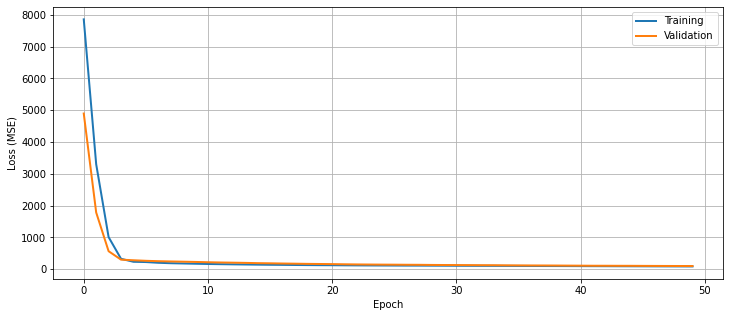

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(model.history.history['loss'], label='Training', linewidth=2)
plt.plot(model.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()

In [39]:
model.evaluate(x=X_test, y=y_test, verbose=False)

35.8244743347168

¿Cómo se ven las predicciones?

In [43]:
preds = model.predict(x=X_test)

print(f"Predicciones:\n{preds.reshape((-1,))[:5]}")
print(f"Reales:\n{y_test[:5]}")

Predicciones:
[30.592382 27.260422 16.736996 20.097075 18.871927]
Reales:
[23.6 32.4 13.6 22.8 16.1]


## Escalando

En este enfoque normalizaremos los datos para observar su efecto en la pérdida promedio.

In [26]:
from sklearn.model_selection import train_test_split

dataset = df.values
X = dataset[:,0:13]
Y = dataset[:,13]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

Observemos la distribución de los datos

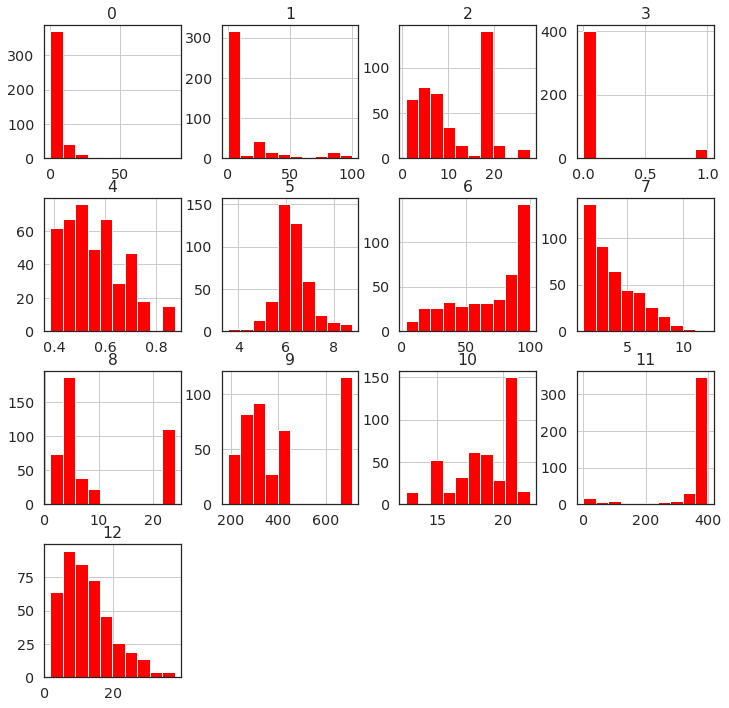

In [27]:
import seaborn as sns

sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(12,12)})
ax = pd.DataFrame(X_train).hist(color='red')
plt.show()

Normalizamos. **Observa que sólo hacemos el fit sobre el conjunto de entrenamiento, el conjunto de prueba se transforma sobre la distribución del conjunto de entrenamiento.**

In [28]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()

X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

Observemos la distribución, después de normalizar.

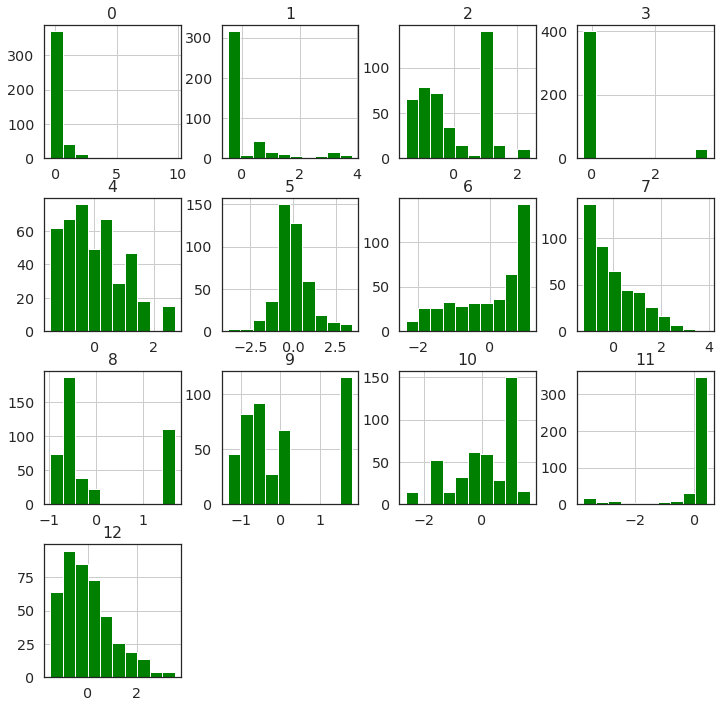

In [29]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(12,12)})
ax = pd.DataFrame(X_train).hist(color='green')
plt.show()

Definimos una red con la misma arquitectura del módelo anterior.

In [20]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dense(1, activation=None))

model.summary()

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 13)                182       
                                                                 
 dense_3 (Dense)             (None, 1)                 14        
                                                                 
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo y evaluamos la perdida en el conjunto de prueba

In [ ]:
n_epocas = 50

history = model.fit(X_train, y_train, epochs=n_epocas, validation_split=0.1)

In [22]:
model.evaluate(x=X_test, y=y_test, verbose=False)

80.21355438232422

## Usando una red más profunda

Ahora, usamos una red más profunda, es decir con más capas ocultas.

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/data/housing.data", delim_whitespace=True, header=None)
dataset = df.values
X = dataset[:,0:13]
Y = dataset[:,13]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

Observemos el efecto de escalar, o no. Para esto, hay que ejecutar o saltar esta celda.

In [ ]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()

X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

Definimos una red con dos capas ocultas de tamaño 13 y 6 respectivamente.

In [ ]:
model = Sequential()
model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(6, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

model.summary()

model.compile(loss='mean_squared_error', optimizer='adam')

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 13)                182       
                                                                 
 dense_18 (Dense)            (None, 6)                 84        
                                                                 
 dense_19 (Dense)            (None, 1)                 7         
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


Entrenamos y evaluamos el módelo

In [ ]:
n_epocas = 50

history = model.fit(X_train, y_train, epochs=n_epocas, validation_split=0.1)

In [ ]:
model.evaluate(x=X_test, y=y_test, verbose=False)

30.750545501708984

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

mean_squared_error(y_test,y_pred)

21.04384657707839

## Usando una red más ancha

En este enfoque usaremos una red más *ancha*, es decir, una sola capa oculta pero con más neuronas.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/data/housing.data", delim_whitespace=True, header=None)
dataset = df.values
X = dataset[:,0:13]
Y = dataset[:,13]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

Observar el efecto de normalizar, ejecutando o saltando esta celda:

In [ ]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()

X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=13, activation='relu'))
model.add(Dense(1, activation=None))

model.summary()

model.compile(loss='mean_squared_error', optimizer='adam')

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 50)                700       
                                                                 
 dense_16 (Dense)            (None, 1)                 51        
                                                                 
Total params: 751
Trainable params: 751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
n_epocas = 50

history = model.fit(X_train, y_train, epochs=n_epocas, validation_split=0.1)

In [ ]:
model.evaluate(x=X_test, y=y_test, verbose=False)

22.056289672851562